### Imports and settings

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline
import al_learning as alle
import awtl_learning as awtl

import sys
sys.path.append('../')
import support_utils as sup
import al_plot_utils as alut
import data_explore_utils as dex
import display_utils as dut

### Import Candsets Supervised & Unsupervised Results etc.

In [2]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})'
sep = ','
# ***********************************************

candsets = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [3]:
candsets.keys()

dict_keys(['ban_bx', 'bx_wor', 'ban_half', 'wor_half', 'bx_half', 'ban_wor'])

In [4]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_train'
sep = ','
# ***********************************************

candsets_train = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [5]:
candsets_train.keys()

dict_keys(['bx_wor', 'bx_half', 'ban_bx', 'wor_half', 'ban_wor', 'ban_half'])

In [6]:
# see DocString of readDataInDictionary() function for information

# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../candsets/books/'
pattern_of_filename = 'candset_feature_(.{2,4}_.{2,4})_test'
sep = ','
# ***********************************************

candsets_test = sup.readDataInDictionary(path_to_directory,pattern_of_filename,sep)

In [7]:
candsets_test.keys()

dict_keys(['ban_half', 'ban_bx', 'ban_wor', 'bx_wor', 'bx_half', 'wor_half'])

#### Feature Sets and Supervised and Unsupervised Results

In [8]:
all_feature = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'binding_exact_sim', 'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

In [9]:
len(all_feature) == len(candsets['ban_bx'].columns.drop(['ids','label']))

True

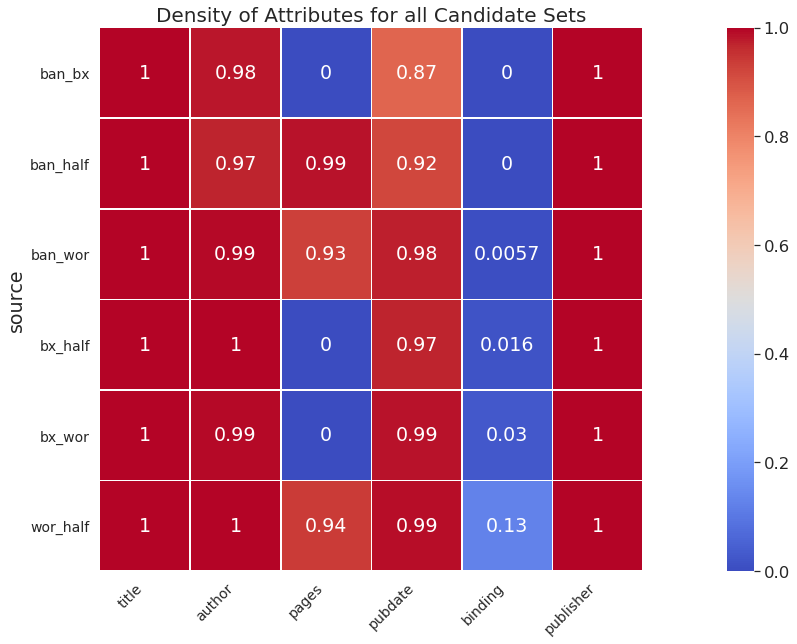

In [10]:
dex.plotDensityAttributesHeatmap(candsets)

In [11]:
# dense features for all combinations

# features excluded where the attribute has a very low density (<3%) for at 
# least one dataset that is involved either as source or target
rc_ban_bx_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_bx_half = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_ban_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pages_num_abs_diff_sim', 'pubdate_days_diff_sim',
       'pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

#
rc_bx_half_wor = ['title_lev_sim', 'title_jac_q3_sim', 'title_jac_an_sim',
       'title_rel_jac_an_sim', 'title_containment_sim', 'title_exact_sim',
       'author_lev_sim', 'author_jac_q3_sim', 'author_jac_an_sim',
       'author_rel_jac_an_sim', 'author_containment_sim', 'author_exact_sim',
       'pubdate_days_diff_sim','pubdate_months_diff_sim', 'pubdate_years_diff_sim',
       'publisher_lev_sim', 'publisher_jac_q3_sim',
       'publisher_jac_an_sim', 'publisher_rel_jac_an_sim',
       'publisher_containment_sim', 'publisher_exact_sim']

# assign the different feature sets (different dense features depending on combination)
dense_features_dict = {'ban_bx_wor':rc_ban_bx_wor,'ban_bx_half':rc_ban_bx_half,
                       'ban_half_wor':rc_ban_half_wor,'bx_half_wor':rc_bx_half_wor,
                       'ban_bx':rc_ban_bx_wor,'ban_half':rc_ban_half_wor,'ban_wor':rc_ban_half_wor,
                       'bx_half':rc_bx_half_wor,'bx_wor':rc_bx_half_wor,'wor_half':rc_ban_half_wor}

In [12]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
path_to_directory = '../../results/benchmarks/'
supervised_results = 'books_candsets_super_results'
unsupervised_results = 'books_candsets_unsuper_results'

# we use the same random_state for all experiments
random_state = 42
# assign which sklearn estimators to use for the TL Experiment
#estimators_tl = {'logreg':LogisticRegression(random_state=random_state,solver='liblinear',max_iter=1000),
#                 'dectree':DecisionTreeClassifier(random_state=random_state),
#                 'randforest':RandomForestClassifier(random_state=random_state,n_estimators=10),
#                 'xgb':xgb.XGBClassifier(random_state=random_state,objective="binary:logistic"),
#                 'svm':LinearSVC(random_state=random_state,dual=False),
#                 #'svm':SVC(random_state=random_state,kernel='linear'),
#                 'logregcv':LogisticRegressionCV(random_state=random_state,cv=5,solver='liblinear',max_iter=1000)}

#### Import Passive Learning (Supervised) Results

In [16]:
candsets_super_results = sup.importJSONFileInDict(path_to_directory+supervised_results)

In [17]:
# the function returnDFWithSuper() returns a dataframe with the supervised results and displays 
# a highlighted dataframe in the output where the best result per candidate set is highlighted.
df_super = alut.returnDFWithSuper(candsets_super_results)

,logreg,logregcv,svm,dectree,randforest,xgb
bx_wor,0.686,0.688,0.678,0.794,0.818,0.856
bx_half,0.731,0.766,0.756,0.866,0.895,0.894
ban_bx,0.655,0.703,0.640,0.794,0.814,0.872
wor_half,0.797,0.802,0.801,0.841,0.864,0.896
ban_wor,0.682,0.708,0.709,0.788,0.830,0.846
ban_half,0.889,0.914,0.897,0.945,0.969,0.960


#### Import Unsupervised Results

In [18]:
candsets_unsuper_results = sup.importJSONFileInDict(path_to_directory+unsupervised_results)

In [19]:
# the function returnDFWithUnsuper() returns a dataframe with the unsupervised results of the 
# elbow threshold method on the weighted sum of similarities and displays 
# a highlighted dataframe in the output where the best result per candidate set is highlighted.
df_unsuper = alut.returnDFWithUnsuper(candsets_unsuper_results)

,F1 score,Elbow Threshold
ban_half,0.761,0.668
ban_bx,0.656,0.438
ban_wor,0.679,0.566
bx_wor,0.703,0.491
bx_half,0.688,0.653
wor_half,0.699,0.541


### Active Learning (no transfer) as Baseline!

#### Run Experiments

In [22]:
import warnings
#from sklearn.exceptions import UndefinedMetricWarning
from sklearn.exceptions import ConvergenceWarning
#warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
# ***CHANGE THE FOLLOWING VARIABLES IF STH CHANGED***
query_strategies = ['lr_lsvc_rf_dt','random']
estimator_names = ['rf']
feature = all_feature
n_labeled = 2 #initially labled 
quota = 100

# ***********************************************

al_results = alle.active_learning_different_settings_all(candsets_train,candsets_test,feature,estimator_names,
                                                         query_strategies,n_labeled,quota,disagreement='vote',
                                                         n=5)

In [24]:
#sup.saveResultsToJSON(al_results,'../../results/benchmarks/books_al_results')

Saved in ../../results/benchmarks/books_al_results.json


#### Import Experiment Results 

In [24]:
al_results = sup.importJSONFileInDict('../../results/benchmarks/books_al_results')

### Active Transfer Learning

#### Run Experiments

##### Weighted Active Learning

In [22]:
# CAUTION: Takes long to compute!
query_strategies = ['lr_lsvc_rf_dt','random']
estimator_names = ['rf']
weighting = [None,'nn','lrcv_predict_proba']
quota = 100
feature = rc_ban_bx_wor
source_name = 'ban_wor'
target_name = 'bx_wor'
# *******************************

awtl_ban_wor_bx_wor = awtl.awtl_single(candsets,candsets_train,candsets_test,source_name,target_name,
                                       feature,estimator_names,query_strategies,quota,weighting=weighting,
                                       disagreement='vote',n=5)

Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_wor and target bx_wor
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 168.84 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 167.93 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 168.82 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 167.67 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |████████████████████████████████████

##### All

In [25]:
# CAUTION: Takes long to compute!
query_strategies = ['lr_lsvc_rf_dt','random']
estimator_names = ['rf']
weighting = [None,'nn','lrcv_predict_proba']
quota = 100

#actually not needed, we provide dense_features dict and hence only the dense features are used
feature = all_feature 
# *******************************

awtl_results_dense = awtl.awtl_all_combinations(candsets,candsets_train,candsets_test,
                                                estimator_names,query_strategies,quota,
                                                feature,dense_features_dict,weighting,
                                                disagreement='vote',n=5,switch_roles=True)

Start with ATL using different settings for source ban_bx and target bx_wor
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_bx and target bx_wor
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 133.38 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 130.61 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 134.00 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 133.21 seconds
5. Run of 5
Initialize Learning Mode

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 42.01 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 40.89 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 42.43 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 41.59 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 42.21 seconds
Start with Weighting Strategy: lr_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lr_predict_proba
Starting ATL Experiments (WITH transfer!) source ban_bx and target ban_half
1. Run

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 86.67 seconds
Start with Weighting Strategy: lr_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lr_predict_proba
Starting ATL Experiments (WITH transfer!) source ban_bx and target bx_half
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 86.36 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 85.43 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 85.03 seconds
Start with Query Strategy: random
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_bx and

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 44.27 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 43.42 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 43.59 seconds
Start with ATL using different settings for source ban_wor and target ban_bx
Start with Estimator: rf
Start with Query Strategy: lr_lsvc_rf_dt
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_wor and target ban_bx
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 105.44 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 82.42 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 80.80 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 81.53 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 81.36 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 79.64 seconds
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source wor_half and target bx_wor
1. Run of 5
Initialize Learning Mo

Starting ATL Experiments (WITH transfer!) source bx_wor and target bx_half
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 372.46 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 352.69 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 352.53 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 350.58 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 109.66 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |███████████████

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 156.16 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 155.36 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 150.23 seconds
Start with Query Strategy: random
Start with Weighting Strategy: None
No Unsupervised Domain Adaptation performed
Starting ATL Experiments (WITH transfer!) source ban_wor and target bx_wor
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 74.49 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 74.26 seconds
3. Run of 5
Initialize Learning Model
Init

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 87.56 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 89.98 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 89.60 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 86.41 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 86.48 seconds
Start with Weighting Strategy: lr_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lr_predict_proba
Starting ATL Experiments (WITH transfer!) source ban_half and target bx_half
1. Ru

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 39.22 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 37.18 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 40.39 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 37.13 seconds
Start with Weighting Strategy: lr_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lr_predict_proba
Starting ATL Experiments (WITH transfer!) source ban_half and target ban_wor
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 35.29 seconds
2. Ru

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 79.85 seconds
Start with Weighting Strategy: lr_predict_proba
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using lr_predict_proba
Starting ATL Experiments (WITH transfer!) source bx_half and target wor_half
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 78.42 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 79.86 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 80.19 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 81.07 seconds
5. Ru

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 62.95 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 61.80 seconds
Start with Weighting Strategy: nn
Unsupervised Domain Adaptation: Calculate sample_weight for the source instances using nn
Starting ATL Experiments (WITH transfer!) source wor_half and target ban_wor
1. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 61.50 seconds
2. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 61.21 seconds
3. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 61.12 seconds
4. Run of 5
Initialize Learning M

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 51.26 seconds
4. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 48.72 seconds
5. Run of 5
Initialize Learning Model
Initialize Query Strategy
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Runtime: 48.75 seconds


In [27]:
sup.saveResultsToJSON(awtl_results_dense,'../../results/awtl/books_awtl_results_dense')

Saved in ../../results/awtl/books_awtl_results_dense.json


### Import AWTL Results

In [27]:
awtl_results_dense = sup.importJSONFileInDict('../../results/awtl/books_awtl_results_dense')

### Compare ATL and AL Results

In [47]:
selected_weighting = 'no_weighting'
selected_qs = None
max_quota = 100

df_awtl_no_weighting = dut.createDFwithAlandAWTLResultsMoreItersUpToMaxQuota(awtl_results_dense,al_results,
                                                                             selected_weighting,
                                                                             candsets_super_results,
                                                                             selected_qs,
                                                                             max_quota,filename='../../results/awtl/books_awtl_nw')

Weighting: no_weighting and Query Strategy: None


In [48]:
selected_weighting = 'nn'
selected_qs = None
max_quota = 100

df_awtl_nn = dut.createDFwithAlandAWTLResultsMoreItersUpToMaxQuota(awtl_results_dense,al_results,
                                                                             selected_weighting,
                                                                             candsets_super_results,
                                                                             selected_qs,
                                                                             max_quota,filename='../../results/awtl/books_awtl_nn')

Weighting: nn and Query Strategy: None


In [49]:
selected_weighting = 'lr_predict_proba'
selected_qs = None
max_quota = 100

df_awtl_lprob = dut.createDFwithAlandAWTLResultsMoreItersUpToMaxQuota(awtl_results_dense,al_results,
                                                                             selected_weighting,
                                                                             candsets_super_results,
                                                                             selected_qs,
                                                                             max_quota,filename='../../results/awtl/books_awtl_lprob')

Weighting: lr_predict_proba and Query Strategy: None


In [51]:
selected_qs = 'lr_lsvc_rf_dt'
max_quota = 100

df_no_weighting_nn_lprob_compared = dut.createDFwithAlandAWTLResultsToCompareDA(awtl_results_dense,al_results,
                                                                                candsets_super_results,
                                                                                selected_qs,max_quota,
                                                                                filename='../../results/awtl/books_awtl_nw_nn_lprob')

All ATL results with no_weighting and nn as well as lr_predict_proba (lp) and Query Strategy: lr_lsvc_rf_dt


In [ ]:
dut.styleDFwithAlandAWTLResultsToCompareDA(df_no_weighting_nn_lprob_compared.loc[[('ban_bx','bx_wor'),
                                                                                  ('ban_wor','ban_bx'),
                                                                                  ('bx_wor','wor_half'),
                                                                                  ('wor_half','bx_wor'),
                                                                                  ('ban_wor','bx_wor'),
                                                                                  ('bx_half','ban_half'),
                                                                                  ('wor_half','bx_half'),
                                                                                  ('bx_half','wor_half')],:],
                                           '../../results/awtl/books_awtl_nw_nn_lprob_subset',
                                           'lr_lsvc_rf_dt')

In [25]:
selected_qs = 'lr_lsvc_rf_dt'
max_quota = 100

df_no_weighting_nn_lprob_compared = dut.createDFwithAlandAWTLResultsToCompareDA(awtl_ban_wor_bx_wor,al_results,
                                                                                candsets_super_results,
                                                                                selected_qs,max_quota,
                                                                                filename=None)

All ATL results with no_weighting and nn as well as lr_predict_proba (lp) and Query Strategy: lr_lsvc_rf_dt


# Plot AWTL Results

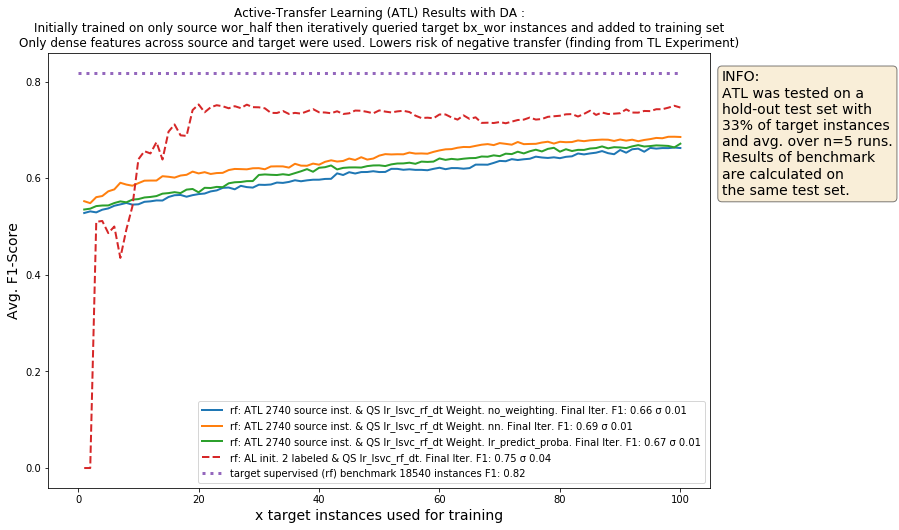

In [58]:
# ***CHANGE THE FOLLOWING VARIABLES AS DESIRED***
source_name = 'wor_half'
target_name = 'bx_wor'
selected_estimator = ['rf']  # None means all! ['lr'] or ['xgb'] or ['lr','xgb']
selected_qs = ['lr_lsvc_rf_dt']  # None means all! ['lr_lsvc_rf_dt','lr_lsvc_dt_xgb','random']
al_also = al_results   # None means only ATL Results are plotted. If al_also = al_results then also al results
quota = 100
n = 5
selected_weights = None

dut.plotAWTLResults(awtl_results_dense,source_name,target_name,quota,candsets,candsets_super_results,n,selected_estimator,al_also,
                   selected_qs,selected_weights,errorbars=False,ylim=None,saveFig=False,path_for_output='./graphics/custom_plots/')